In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


In [2]:
d1 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv"
d2 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_errors.csv"
d3 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_maint.csv"
d4 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_failures.csv"
d5 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_machines.csv"

In [3]:
telemetry_df = pd.read_csv(d1)
errors_df = pd.read_csv(d2)
maint_df = pd.read_csv(d3)
failures_df = pd.read_csv(d4)
machines_df = pd.read_csv(d5)

In [2]:
# Otra opcion de carga para lectura de los datos
telemetry_df = pd.read_csv('PdM_telemetry.csv')
errors_df = pd.read_csv('PdM_errors.csv')
maint_df = pd.read_csv('PdM_maint.csv')
failures_df = pd.read_csv('PdM_failures.csv')
machines_df = pd.read_csv('PdM_machines.csv')

# ABSTRACT
Las empresas buscan como aumentar el tiempo de servicio de las maquinas, reducir las paradas inesperadas, reducir costos de mantenimiento, aumentar la eficacia de máquinas individuales o líneas de producción y reducir el backlog (tiempo necesario para realizar el trabajo actual).
Todo esto lleva a la necesidad de encontrar formas más precisa de conocer o predecir el comportamiento futuro de la maquinaria basándose desde la adquisición y análisis de datos e información que se puede obtener a través del monitoreo real y continuo de la condición de trabajo de los equipos. 

Cuando se tiene disponibles datos sobre ciertos parámetros de funcionamiento de las maquinarias,el empleo de modelos de machine learning pueden ayudar a resolver algunos problemas a los que se enfrentan en el tiempo operativo, los gestores de mantenimiento, como ser:

- Existe alguna relacion entre los parametros monitoreados de las maquinas que permita modelar ese efecto?
-	Se podrían configurar alertas sobre comportamiento irregular en la maquinaria captando las variaciones en los valores habituales de los datos que provocan los efectos de una condición de falla inminente.
-	La posibilidad de realizar diagnóstico de tipos de fallas, prevención de las fallas, planificar y gestionar acciones correctivas o de mitigación de tareas de mantenimiento para evitar los eventos de falla.



## Contexto Comercial
La falla de un equipamiento puede implicar el daño de los componentes electrónicos en alguna parte del proceso lo que traería como consecuencia el tener que reciclar el material y volver a empezar el proceso desde el inicio. Adicionalmente a esto, un equipo con falla podría interrumpir otras etapas de los procesos generando atrasos y perdidas superlativas debido a la interrelación de los procesos entre si.


## Problema Comercial
Es de suma importancia que las fallas incipientes en los equipos puedan ser atendidas antes de que se genere la perdida de la función deseada. De aquí, la necesidad de mitigar o reducir la probabilidad de ocurrencia de fallas con el objetivo de minimizar las paradas no planificadas tanto como sea posible

# EDA

In [4]:
telemetry_df.head(3)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847

In [5]:
errors_df.head(3)

datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5

In [9]:
maint_df.head(3)

datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3

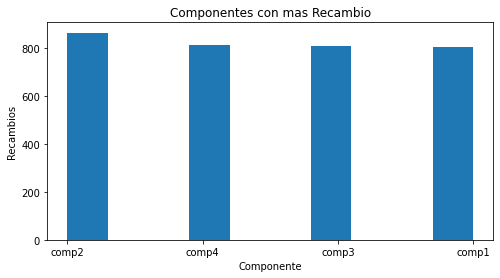

In [39]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(maint_df['comp'])
ax.set_title('Componentes con mas Recambio')
ax.set_xlabel('Componente')
ax.set_ylabel('Recambios')
plt.show()

In [10]:
failures_df.head(3)

datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2

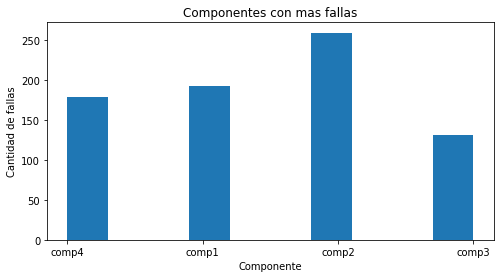

In [37]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(failures_df['failure'])
ax.set_title('Componentes con mas fallas')
ax.set_xlabel('Componente')
ax.set_ylabel('Cantidad de fallas')
plt.show()

In [11]:
machines_df.head(3)

machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8

In [ ]:
!pip install -U dataprep

In [ ]:
from dataprep.eda import create_report
report = create_report(telemetry_df, title='Reporte Telemetria')

Reporte Telemetria
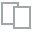
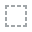
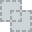
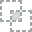
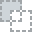
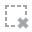
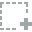
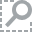
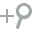
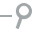
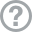
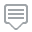
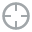
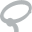
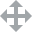
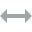
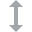
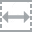
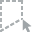
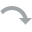
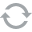
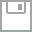
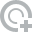
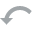
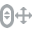
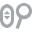
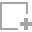
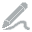
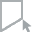
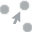
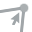
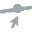

In [ ]:
report

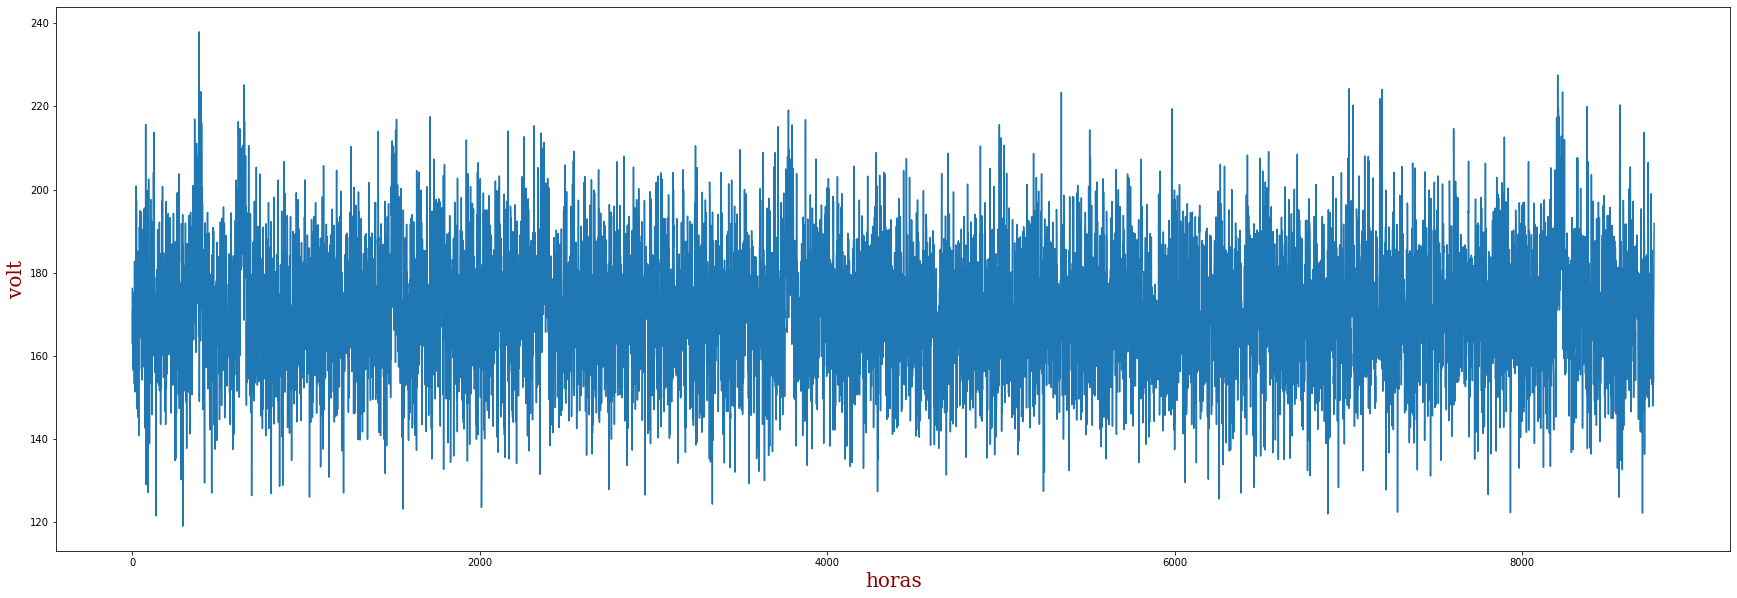

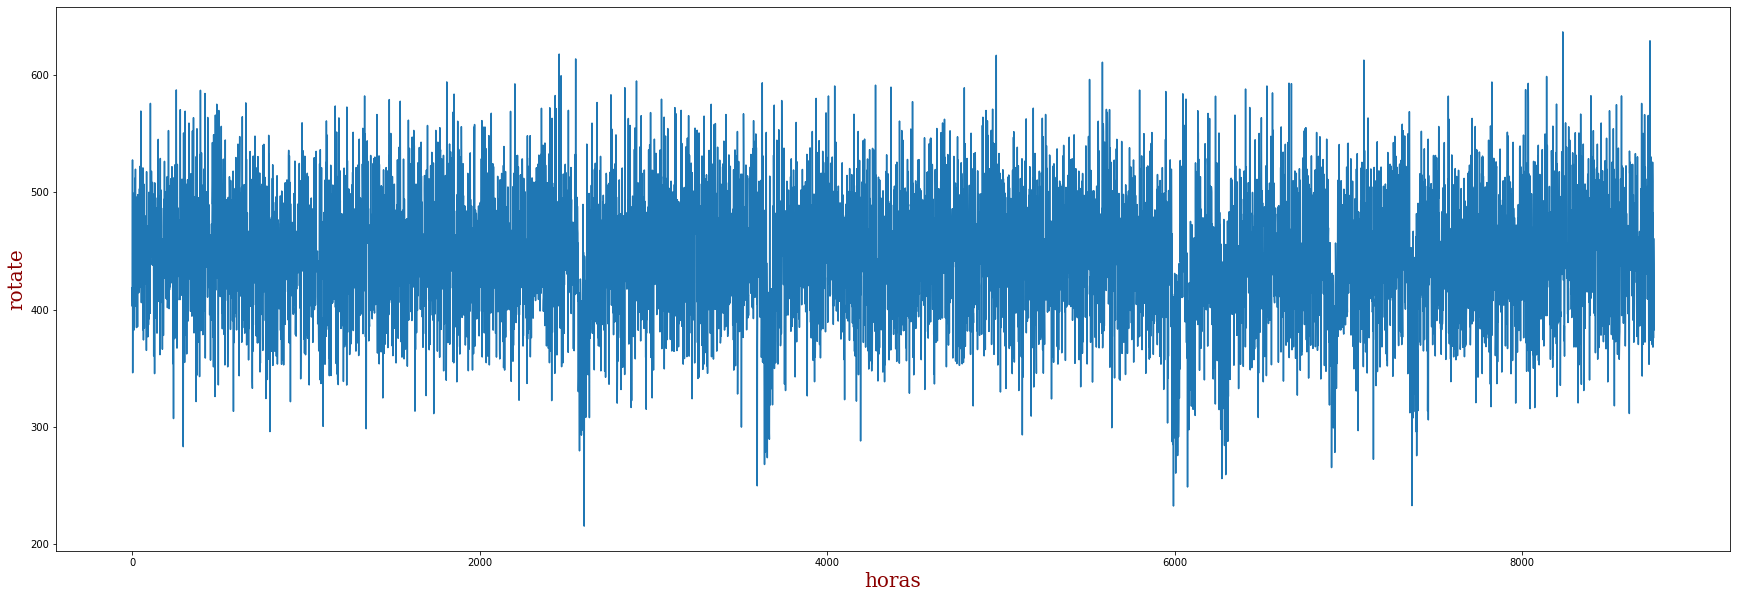

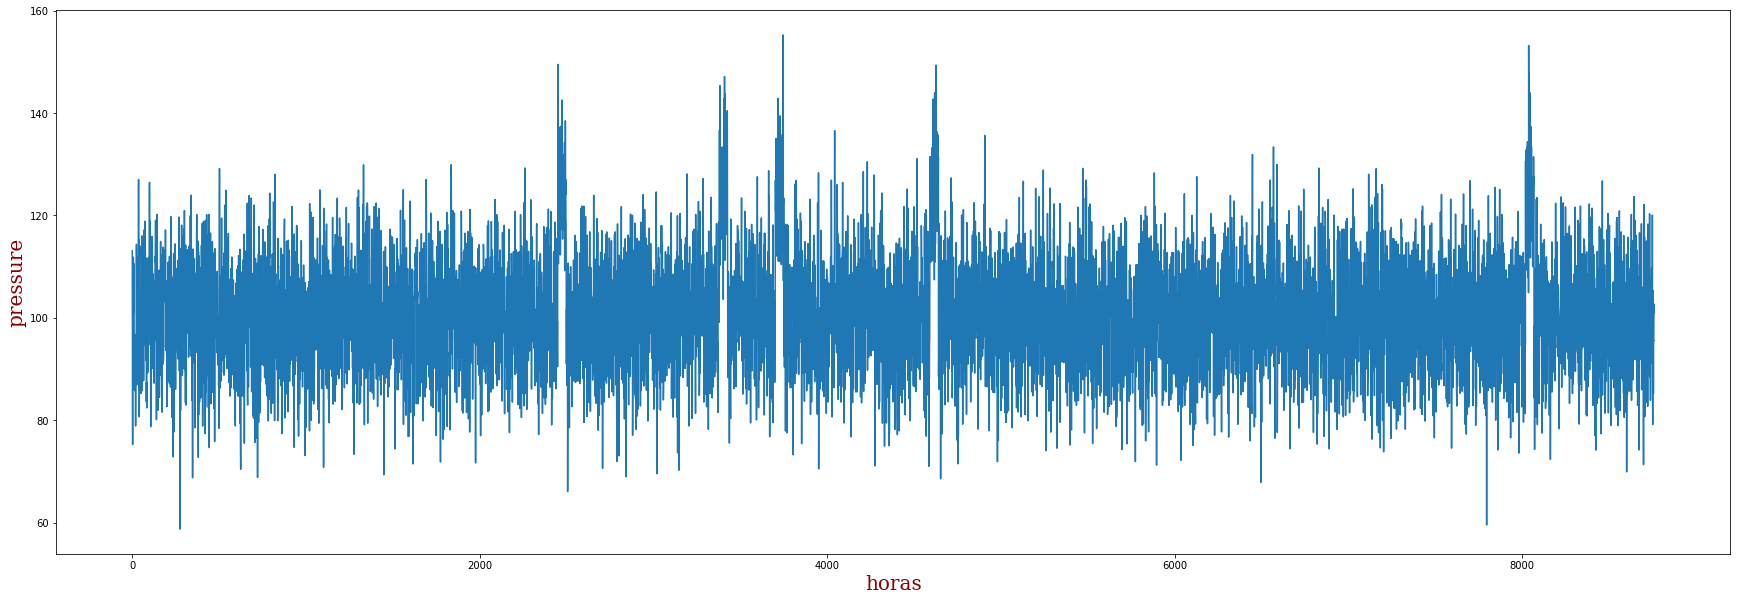

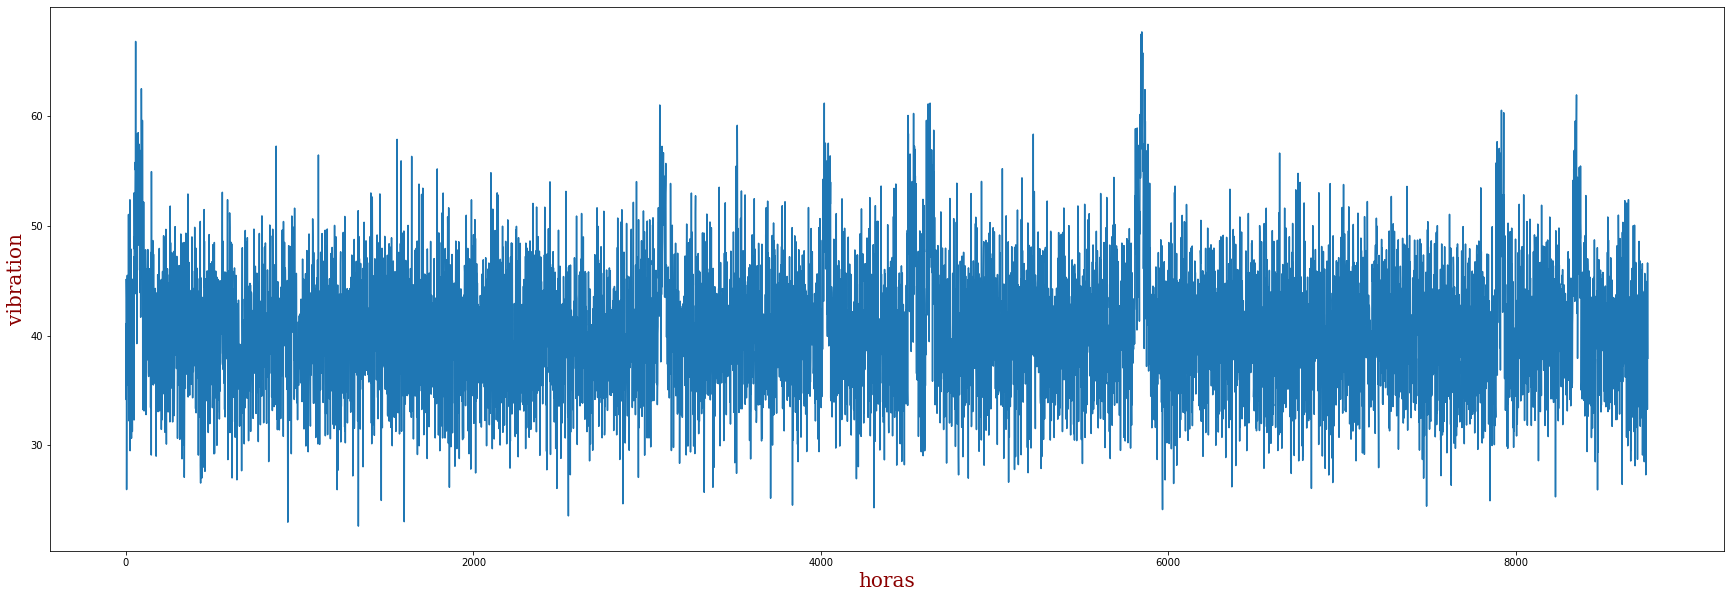

In [13]:
# Paramatros de telemetria para un equipo Machine 7
tele_machine_7=telemetry_df[telemetry_df['machineID']==7]
date_time= range(0,len(tele_machine_7))
for i in range(2,6):
 fig=plt.figure(figsize=(30,10))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_7),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
 plt.xlabel('horas',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})

In [4]:
#Funcion para convertir el formato de la fecha de las tablas
tablas = [telemetry_df, maint_df, failures_df, errors_df]
for df in tablas:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
print('El total de registros de telemetria es:' ,telemetry_df.shape)
print('El total de registros de mantenimientos es:',maint_df.shape)
print('El total de registros de fallas es:',failures_df.shape)
print('El total de registros de errores es:',errors_df.shape)

El total de registros de telemetria es: (876100, 6)
El total de registros de mantenimientos es: (3286, 3)
El total de registros de fallas es: (761, 3)
El total de registros de errores es: (3919, 3)


In [8]:
print('Cantidad unica de maquinas:' ,telemetry_df.machineID.nunique())

Cantidad unica de maquinas: 100


Las instancias de los parametros de funcionamiento no presentan valores nulos

In [ ]:
telemetry_df.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Los registros de la tabla telemetry van de enero del 2015 al primer dia del 2016

In [ ]:
# Cual es marco temporal de la data telemetry
telemetry_df.datetime.describe(datetime_is_numeric=True)

count                           676578
mean     2015-07-02 08:04:27.055683328
min                2015-01-01 06:00:00
25%                2015-04-01 16:00:00
50%                2015-07-02 05:00:00
75%                2015-10-01 18:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

En los registros de Mantenimiento se pueden encontrar datos del año 2014

In [ ]:
maint_df.datetime.describe(datetime_is_numeric=True)

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
telemetry_df.corr()

machineID      volt    rotate  pressure  vibration
machineID   1.000000 -0.001037  0.000171  0.005192  -0.000922
volt       -0.001037  1.000000 -0.001511  0.001652   0.002390
rotate      0.000171 -0.001511  1.000000 -0.000688  -0.003056
pressure    0.005192  0.001652 -0.000688  1.000000   0.001395
vibration  -0.000922  0.002390 -0.003056  0.001395   1.000000

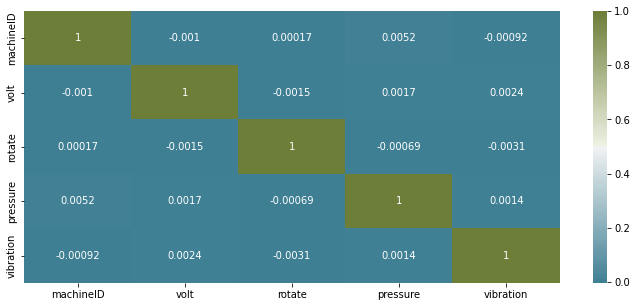

In [7]:
# calculate correlation matrix
corr0 = telemetry_df.corr()# plot the heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr0, xticklabels=corr0.columns, yticklabels=corr0.columns, annot=True, cmap=sns.diverging_palette(220, 100, as_cmap=True))

Como se observa en la matriz de correlacion, los valores son muy cercanos a cero, indicando la no dependencia de los parametros estudiados. 

## Analisis sobre eventos de intervencion de mantenimiento(fallas, errores, mantenimientos)

In [ ]:
maint_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Cantidad de registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

Se puede observar como aumentó la frecuencia de las intervenciones de mantenimiento a los equipos durante el año 2015. Sin embargo esto puede deberse a muchos motivos como falta de una politica de registro de las fallas durante el 2014,ausencia de un programa confiable de registro de intervenciones, etc

## Existira alguna relacion entre la cantidad de mantenimiento, cantidad de errores y la edad?

In [5]:
# Unir la tabla que contiene la informacion de las maquinas con la informacion de los errores
errores_maquinas = errors_df.groupby("machineID").size()
errores_maquinas = pd.DataFrame(errores_maquinas, columns=['num_errors']).reset_index()
maquinaria_eventos_df = pd.merge(machines_df, errores_maquinas, how='left', on="machineID")
maquinaria_eventos_df

machineID   model  age  num_errors
0           1  model3   18          35
1           2  model4    7          28
2           3  model3    8          39
3           4  model3    7          31
4           5  model3    2          38
..        ...     ...  ...         ...
95         96  model2   10          39
96         97  model2   14          45
97         98  model2   20          45
98         99  model1   14          54
99        100  model4    5          31

[100 rows x 4 columns]

In [6]:
# Aca hacemos una union con la tabla de los errores para agregar los registros de mantenimientos
maint_maquinas = maint_df.groupby("machineID").size()
maint_maquinas  = pd.DataFrame(maint_maquinas, columns=["num_maint"]).reset_index()

maquinaria_eventos_df = pd.merge(maquinaria_eventos_df, maint_maquinas , how='left', on="machineID")
maquinaria_eventos_df

machineID   model  age  num_errors  num_maint
0           1  model3   18          35         37
1           2  model4    7          28         32
2           3  model3    8          39         37
3           4  model3    7          31         33
4           5  model3    2          38         35
..        ...     ...  ...         ...        ...
95         96  model2   10          39         33
96         97  model2   14          45         34
97         98  model2   20          45         37
98         99  model1   14          54         34
99        100  model4    5          31         28

[100 rows x 5 columns]

In [7]:
fallas_maquinas = failures_df.groupby("machineID").size()
fallas_maquinas = pd.DataFrame(fallas_maquinas, columns=["num_failure"]).reset_index()

maquinaria_eventos_df = pd.merge(maquinaria_eventos_df, fallas_maquinas, how='left', on="machineID")
maquinaria_eventos_df

machineID   model  age  num_errors  num_maint  num_failure
0           1  model3   18          35         37          7.0
1           2  model4    7          28         32          4.0
2           3  model3    8          39         37          5.0
3           4  model3    7          31         33          6.0
4           5  model3    2          38         35          7.0
..        ...     ...  ...         ...        ...          ...
95         96  model2   10          39         33          5.0
96         97  model2   14          45         34          8.0
97         98  model2   20          45         37         16.0
98         99  model1   14          54         34         19.0
99        100  model4    5          31         28          3.0

[100 rows x 6 columns]

In [18]:
sns.color_palette('ocean')
sns.barplot(data= maquinaria_eventos_df , x = 'model' , y = 'num_failure')

Aca podemos ver cuales maquinas y de que modelos son los que presentan mayor numero de fallas

In [ ]:
pd.merge( telemetry_df, maquinaria_eventos_df ,how= 'right' , on='machineID')

datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration   model  age  num_errors  num_maint  num_failure  
0       45.087686  model3   18          35         37          7.0  
1       43.413973  model3   18          35         37          7.0  
2       34.178847  model3   18          35         37          7.0  
3       41.122144  model3   18          35         37          7.0  
4       25.990511  model3   18          35         37          7.0  
...           ...     ...  ...         ...        ...          ...  
876095  50.771941  model4    5          31         28          3.0  
876096  35.123072  model4    5          31         28          3.0  
876097  48.314561  model4    5          31         28          3.0  
876098  44.835259  model4    5          31         28          3.0  
876099  37.845245  model4    5          31         28          3.0  

[876100 rows x 11 columns]

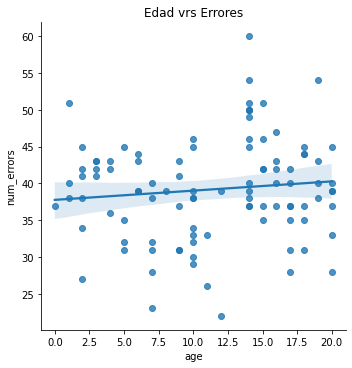

In [ ]:
sns.lmplot(x='age', y = 'num_errors', data= maquinaria_eventos_df).set(title='Edad vrs Errores')

No se puede apreciar mayor relacion entre estas dos variables

In [ ]:
sns.lmplot(x='age', y = 'num_maint', data= maquinaria_eventos_df).set(title='Edad vrs Mantenimientos')

Similar a la grafica anterior (age-errors) aca tampoco se aprecia una correlacion entre las variables estudiadas.

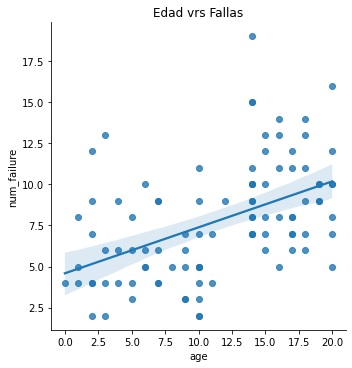

In [ ]:
sns.lmplot(x='age', y = 'num_failure', data= maquinaria_eventos_df).set(title='Edad vrs Fallas')

A diferencia de las otras graficas estudiada y talvez como era de esperarse, aca si se puede observar algun tipo de relacion entre la edad de las maquinas y la cantidad de fallas que registran. Sin embargo, tambien se observa valores muy dispersos.

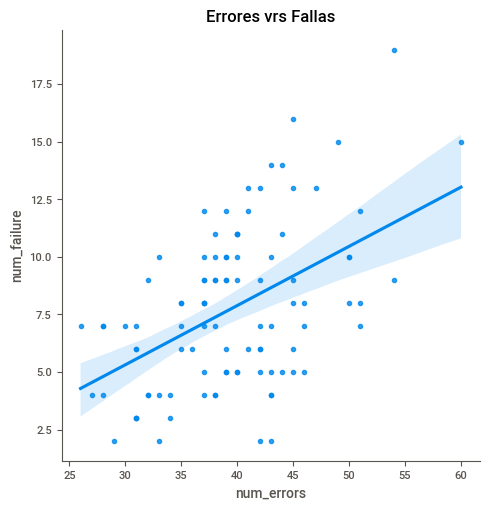

In [ ]:
sns.lmplot(x='num_errors', y = 'num_failure', data= maquinaria_eventos_df).set(title='Errores vrs Fallas')

Como lo muestra la grafica, hay alguna correlacion entre la edad y las fallas. Pero tambien se puede observar alguna correlacion entre los eventos de errores y las fallas.

In [ ]:
maquinaria_eventos_df.corr()

machineID       age  num_errors  num_maint  num_failure
machineID     1.000000  0.100196    0.107982  -0.077903     0.096496
age           0.100196  1.000000    0.106931   0.075445     0.476459
num_errors    0.107982  0.106931    1.000000  -0.026558     0.483735
num_maint    -0.077903  0.075445   -0.026558   1.000000    -0.030258
num_failure   0.096496  0.476459    0.483735  -0.030258     1.000000

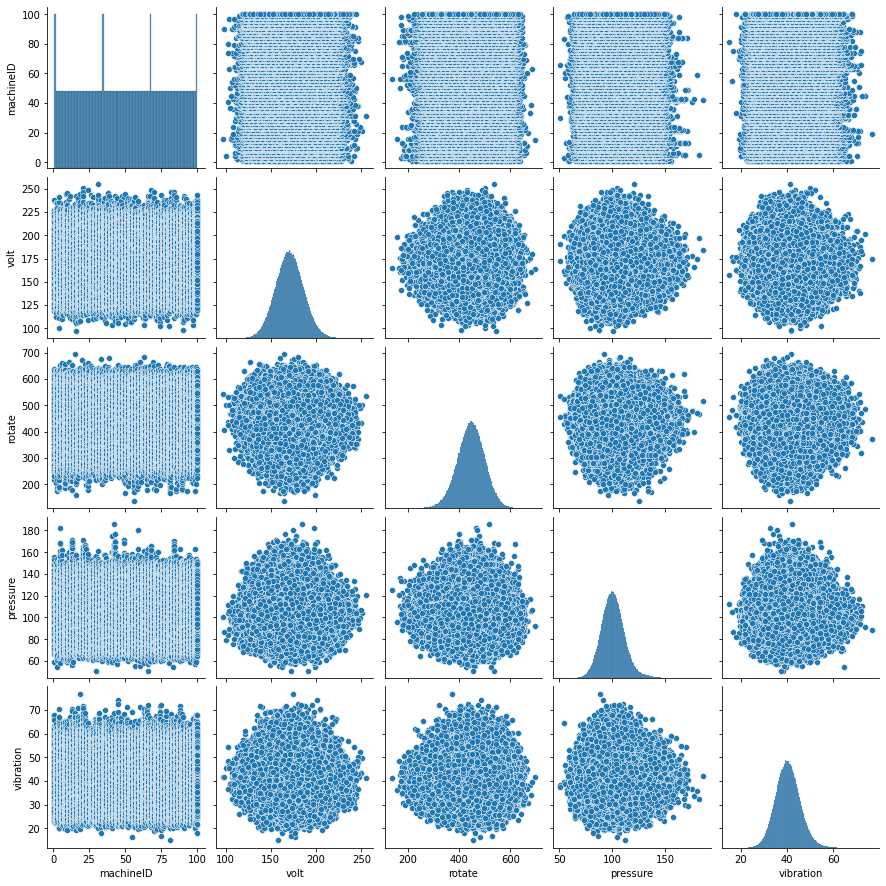

In [ ]:
sns.pairplot (telemetry_df)

En este pairplot se pueden observar como se distribuyen todos los valores de los parametros de funcionamiento registrados. Se pueden observar como algunos parametros muestran algunos valores un poco alejados de la media. Seran estos puntos evidencia de una falla?

In [ ]:
telemetry_df.nlargest(10,'vibration')

datetime  machineID        volt      rotate    pressure  \
159976  2015-04-06 04:00:00         19  174.840612  373.066912   88.172375   
385504  2015-01-02 02:00:00         45  201.023064  487.681597   91.665983   
385524  2015-01-02 22:00:00         45  180.295897  435.583643  110.197020   
653385  2015-07-31 13:00:00         75  182.932649  320.885082  106.370366   
573049  2015-05-30 14:00:00         66  194.938019  472.430625  101.707816   
181495  2015-09-19 17:00:00         21  187.571417  407.162076   99.166685   
765199  2015-05-05 22:00:00         88  166.727672  403.553630   94.233712   
645599  2015-09-10 04:00:00         74  138.103104  512.076404  108.107355   
440720  2015-04-22 12:00:00         51  165.211271  544.775757  116.775549   
522510  2015-08-23 01:00:00         60  140.188130  447.091985   93.716004   

        vibration  
159976  76.791072  
385504  73.948949  
385524  72.335124  
653385  71.972128  
573049  71.949134  
181495  71.752014  
765199  71.751134  
645599  71.601768  
440720  71.182495  
522510  71.049543

Se observa que la maquina19 registra el valor mas alto de vibracion. Podra existir alguna relacion entre la lectura de la vibracion y los episodios de falla presantados por esa maquina?

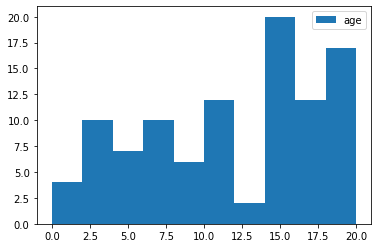

In [ ]:
machines_df['age'].hist(grid=False, legend=True) # Distribucion de la edad de la maquinaria

In [22]:
pd.merge(telemetry_df,failures_df, how = 'inner') # Este dataframe solo incluye las instancias con fallas

datetime  machineID        volt      rotate    pressure  \
0    2015-01-05 06:00:00          1  179.303153  499.777962  111.833028   
1    2015-03-06 06:00:00          1  198.257975  456.862342   89.333995   
2    2015-04-20 06:00:00          1  180.050801  346.362480  105.661164   
3    2015-06-19 06:00:00          1  187.673963  493.005160  105.334392   
4    2015-09-02 06:00:00          1  144.094532  409.380150  106.720871   
..                   ...        ...         ...         ...         ...   
756  2015-11-29 06:00:00         99  205.336154  398.728678  116.164197   
757  2015-12-14 06:00:00         99  152.143212  394.182739  114.212265   
758  2015-02-12 06:00:00        100  226.666914  484.516473   97.521897   
759  2015-09-10 06:00:00        100  201.781023  520.820195   90.944571   
760  2015-12-09 06:00:00        100  144.720190  377.188361  109.995936   

     vibration failure  
0    52.383097   comp4  
1    38.671900   comp1  
2    39.218055   comp2  
3    53.963961   comp4  
4    57.454990   comp4  
..         ...     ...  
756  35.588661   comp3  
757  40.852043   comp4  
758  53.129437   comp1  
759  39.066892   comp1  
760  28.433400   comp2  

[761 rows x 7 columns]

In [9]:
! pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 7.7 MB/s eta 0:00:00


In [10]:
import sweetviz as sv

c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
report1 = sv.analyze(df_modelo1)
report1.show_html()

NameError: name 'df_modelo1' is not defined

![](https://drive.google.com/uc?export=view&id=1pNpNwEcGmR1tO30HDE9T6UOr3rKXb1b1)

# DESAFIO n12: Encondin , Features Engineering y Entrenamiento

## Encoding

In [13]:
# Se transformaron los atributos categoricos de las fallas a numericos 
prueba = pd.merge(telemetry_df,failures_df, how = 'outer')
df_dum1 = pd.get_dummies(prueba, columns=['failure'], prefix = 'fail')
df_dum1.sample(5)

datetime  machineID        volt      rotate    pressure  \
446616  2015-12-23 03:00:00         51  183.699242  368.980692  111.154038   
661597  2015-07-07 08:00:00         76  173.190897  444.921263   81.733703   
243931  2015-11-04 04:00:00         28  146.593402  418.383818   94.636877   
45155   2015-02-26 11:00:00          6  152.630915  449.203604   94.034385   
253907  2015-12-24 19:00:00         29  186.727884  476.736764  108.122237   

        vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4  
446616  42.084168           0           0           0           0  
661597  35.890966           0           0           0           0  
243931  46.240118           0           0           0           0  
45155   37.865247           0           0           0           0  
253907  41.927551           0           0           0           0

In [15]:
df_dum = pd.merge(df_dum1,machines_df, how = 'outer')
df_dum.head(3)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4   model  age  
0  45.087686           0           0           0           0  model3   18  
1  43.413973           0           0           0           0  model3   18  
2  34.178847           0           0           0           0  model3   18

In [17]:
# Se utiliza el modelo1 porque es el que presenta mayores eventos de falla
df_modelo1 = df_dum[df_dum['model']== 'model1']
df_modelo1.head(5)

datetime  machineID        volt      rotate    pressure  \
105136  2015-01-01 06:00:00         13  155.172892  456.320444   96.090782   
105137  2015-01-01 07:00:00         13  183.752447  439.656853  102.744687   
105138  2015-01-01 08:00:00         13  174.731896  399.487309  114.171005   
105139  2015-01-01 09:00:00         13  159.881546  461.922370   95.503275   
105140  2015-01-01 10:00:00         13  174.588451  459.084780   94.029010   

        vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4   model  age  
105136  32.522588           0           0           0           0  model1   15  
105137  37.099813           0           0           0           0  model1   15  
105138  34.519719           0           0           0           0  model1   15  
105139  43.790212           0           0           0           0  model1   15  
105140  41.195627           0           0           0           0  model1   15

In [18]:
df_modelo2 = pd.merge(df_modelo1,errors_df, how = 'inner')
df_modelo2.sample(5)

datetime  machineID        volt      rotate    pressure  \
360  2015-09-30 06:00:00         37  180.231089  450.963989   93.071051   
192  2015-01-04 06:00:00         23  174.798358  374.486823   95.281729   
477  2015-06-28 07:00:00         56  150.510448  505.890854  107.441445   
366  2015-11-14 06:00:00         37  179.679017  379.287751   93.482094   
527  2015-10-09 20:00:00         58  155.531970  441.484589  100.091074   

     vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4   model  age  \
360  55.016585           0           0           0           0  model1   16   
192  34.434507           0           0           0           0  model1   17   
477  36.510857           0           0           0           0  model1   10   
366  38.092071           0           0           0           0  model1   16   
527  44.137118           0           0           0           0  model1    5   

    errorID  
360  error5  
192  error2  
477  error2  
366  error2  
527  error4

In [19]:
print('La composicion del dataframe del modelo2 es:' , df_modelo2.shape)

La composicion del dataframe del modelo2 es: (673, 13)


In [32]:
dum2 = pd.get_dummies(df_modelo2, columns=['errorID'], prefix = 'er')
dum2.sample(5)

datetime  machineID        volt      rotate    pressure  \
119831  2015-09-03 02:00:00         85  182.872410  367.370992   83.805965   
28408   2015-03-29 17:00:00         22  147.168037  394.640764   95.705137   
79393   2015-01-22 01:00:00         42  160.941297  405.777737   92.850557   
71118   2015-02-11 10:00:00         37  178.094177  507.443236  112.570220   
8855    2015-01-04 18:00:00         16  192.282804  451.816812  106.578591   

        vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4   model  \
119831  35.439117         0.0         0.0         0.0         0.0  model1   
28408   38.021075         0.0         0.0         0.0         0.0  model1   
79393   36.848986         0.0         0.0         0.0         0.0  model1   
71118   37.292245         0.0         0.0         0.0         0.0  model1   
8855    37.108698         0.0         0.0         0.0         0.0  model1   

         age  er_error1  er_error2  er_error3  er_error4  er_error5  
119831  16.0          0          0          0          0          0  
28408   14.0          0          0          0          0          0  
79393    7.0          0          0          0          0          0  
71118   16.0          0          0          0          0          0  
8855     3.0          0          0          0          0          0

In [24]:
dum2['error_error1'].value_counts()

0    520
1    153
Name: error_error1, dtype: int64

In [36]:
dum2['fail_comp3'].value_counts()

0.0    140183
1.0        68
Name: fail_comp3, dtype: int64

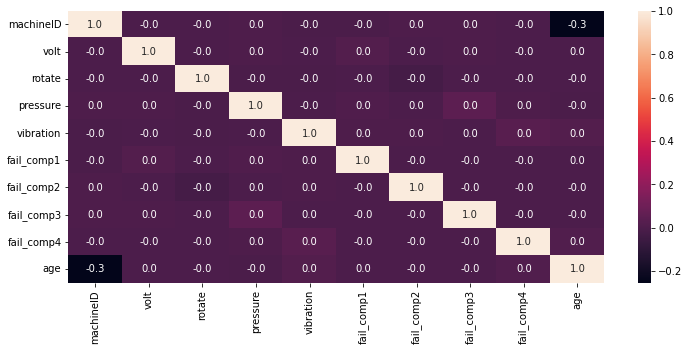

In [ ]:
# Se muestra la correlacion sin incluir el encoder de los errores
corr = df_modelo1.corr()
plt.figure(figsize = (12,5))
sns.heatmap(corr , annot= True , fmt = '.1f')

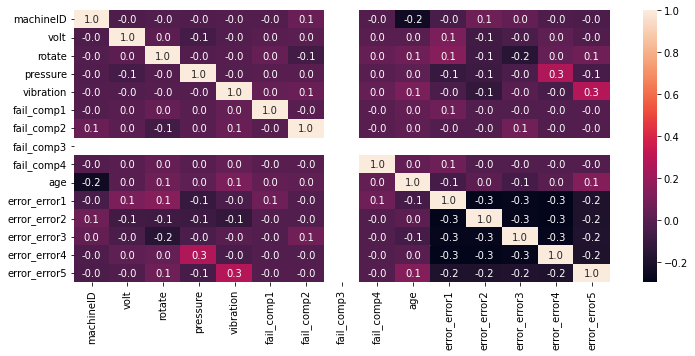

In [ ]:
corr = dum2.corr()
plt.figure(figsize = (12,5))
sns.heatmap(corr , annot= True , fmt = '.1f')

In [ ]:
df_modelo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140190 entries, 105136 to 867380
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    140190 non-null  datetime64[ns]
 1   machineID   140190 non-null  int64         
 2   volt        140190 non-null  float64       
 3   rotate      140190 non-null  float64       
 4   pressure    140190 non-null  float64       
 5   vibration   140190 non-null  float64       
 6   fail_comp1  140190 non-null  uint8         
 7   fail_comp2  140190 non-null  uint8         
 8   fail_comp3  140190 non-null  uint8         
 9   fail_comp4  140190 non-null  uint8         
 10  model       140190 non-null  object        
 11  age         140190 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1), uint8(4)
memory usage: 10.2+ MB


In [22]:
dum2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 672
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      673 non-null    object 
 1   machineID     673 non-null    int64  
 2   volt          673 non-null    float64
 3   rotate        673 non-null    float64
 4   pressure      673 non-null    float64
 5   vibration     673 non-null    float64
 6   fail_comp1    673 non-null    uint8  
 7   fail_comp2    673 non-null    uint8  
 8   fail_comp3    673 non-null    uint8  
 9   fail_comp4    673 non-null    uint8  
 10  model         673 non-null    object 
 11  age           673 non-null    int64  
 12  error_error1  673 non-null    uint8  
 13  error_error2  673 non-null    uint8  
 14  error_error3  673 non-null    uint8  
 15  error_error4  673 non-null    uint8  
 16  error_error5  673 non-null    uint8  
dtypes: float64(4), int64(2), object(2), uint8(9)
memory usage: 53.2+ KB


## Desbalanceo de instancias
Pequena cantidad de instancias con fallas 

Si revisamos las instancias de falla de los componentes, podemos notar que la proporcion de los eventos de falla es mucho menor con relacion a los eventos de no falla. Esto es, una dataset muy desbalanceado

In [ ]:
df_modelo1['fail_comp1'].value_counts()  

0    140157
1        33
Name: fail_comp1, dtype: int64

In [37]:
dum2['fail_comp3'].value_counts()  

0.0    140183
1.0        68
Name: fail_comp3, dtype: int64

In [26]:
pd.DataFrame(df_modelo1.groupby(['fail_comp3'])['machineID'].agg('count'))

machineID
fail_comp3           
0              140122
1                  68

In [38]:
pd.DataFrame(dum2.groupby(['fail_comp3'])['machineID'].agg('count'))

machineID
fail_comp3           
0.0            140183
1.0                68

In [68]:
! pip install imbalanced-learn

     -------------------------------------- 225.4/225.4 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [69]:
import imblearn
print(imblearn.__version__)

0.10.0


In [112]:
# Oversample y plot imbalanced dataset con SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [124]:
counter = Counter(y)
print('El conteo antes del oversampling:' , counter)

El conteo antes del oversampling: Counter({0: 140122, 1: 68})


In [129]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [130]:
# Se aplica el metodo SMOTE para balancear el dataset
counter = Counter(y)
print('El conteo despues del oversampling:' , counter)

El conteo despues del oversampling: Counter({0: 140122, 1: 140122})


En esta tabla se puede observar que el tiempo minimo entre dos fallas consecutivas en una misma maquina es de 30 dias. Por lo tanto, deseariamos que nuestro modelo pudiera ser capaz de hacer una prediccion con menos de 30 dias de anticipacion.

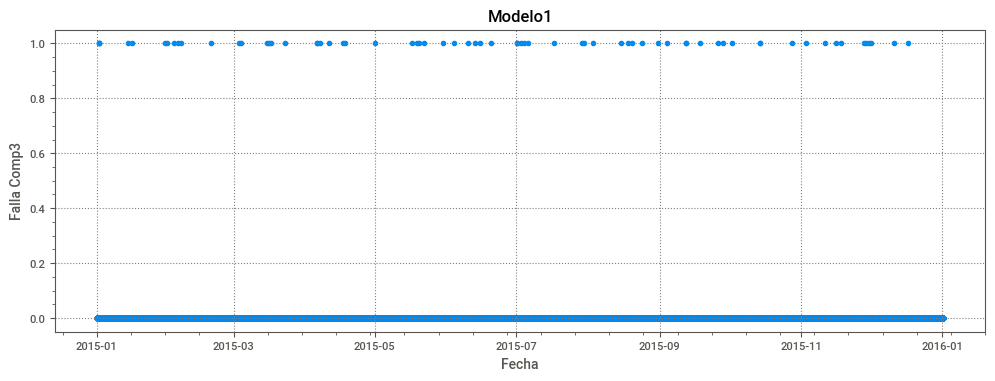

In [ ]:
fig, ax = plt.subplots(figsize = (12,4))
ax.scatter(df_modelo1['datetime'], df_modelo1['fail_comp3'])
ax.set_title('Modelo1')
ax.set_xlabel('Fecha')
ax.set_ylabel('Falla Comp3')
plt.minorticks_on()
plt.grid(linestyle =':', color ='gray' )
plt.show()

## Seleccion de Variables

Se realizaran pruebas con un dataset que no incluye las variables de los errores y otro que si los incluye

In [88]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [161]:
df_modelo1.head(3)

datetime  machineID        volt      rotate    pressure  \
105136  2015-01-01 06:00:00         13  155.172892  456.320444   96.090782   
105137  2015-01-01 07:00:00         13  183.752447  439.656853  102.744687   
105138  2015-01-01 08:00:00         13  174.731896  399.487309  114.171005   

        vibration  fail_comp1  fail_comp2  fail_comp3  fail_comp4   model  age  
105136  32.522588           0           0           0           0  model1   15  
105137  37.099813           0           0           0           0  model1   15  
105138  34.519719           0           0           0           0  model1   15

In [125]:
X = df_modelo1[['age','volt','rotate','pressure','vibration']]

In [126]:
scaledX = scale.fit_transform(X)

In [127]:
scaledX

array([[ 0.52742489, -1.00292909,  0.18789564, -0.45171589, -1.46279141],
       [ 0.52742489,  0.8331478 , -0.12677324,  0.1285208 , -0.61691928],
       [ 0.52742489,  0.25362772, -0.88531959,  1.12492359, -1.09372123],
       ...,
       [ 0.33563875,  1.33125292, -0.51796528, -0.02198535,  0.51118049],
       [ 0.33563875,  0.94052349, -0.56812932, -0.1487939 , -0.44939511],
       [ 0.33563875, -0.1506157 , -0.34708509,  0.57807479,  0.69393082]])

In [174]:
y = df_modelo1['fail_comp3'] # Es el componente que registra mayor cantidad de eventos de falla
y

105136    0
105137    0
105138    0
105139    0
105140    0
         ..
867376    0
867377    0
867378    0
867379    0
867380    0
Name: fail_comp3, Length: 140190, dtype: uint8

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Features Selection

In [162]:
model = ExtraTreesClassifier()
model.fit(scaledX,y)
print(model.feature_importances_)

[0.06687396 0.22443624 0.21842058 0.26065568 0.22961354]


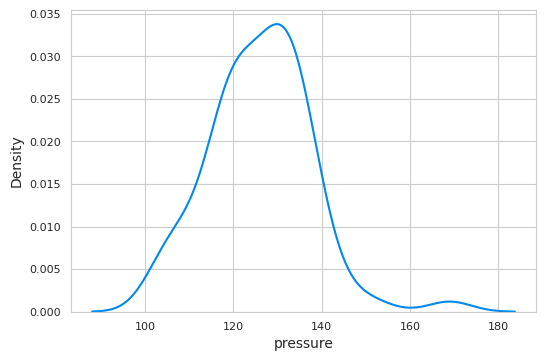

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data=df_modelo1.loc[df_modelo1['fail_comp3']== 1], x=	'pressure')
plt.show()

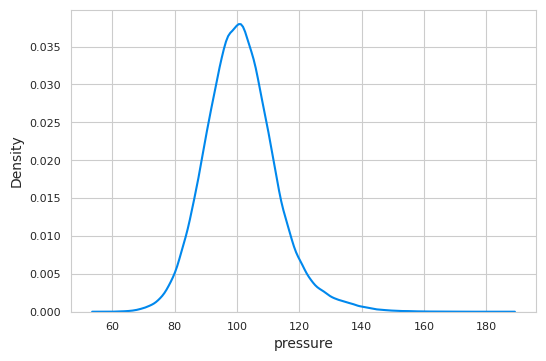

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data=df_modelo1.loc[df_modelo1['fail_comp3']== 0], x=	'pressure')
plt.show()

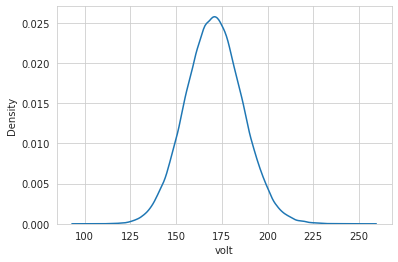

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data=df_modelo1.loc[df_modelo1['fail_comp3']== 0], x=	'volt')
plt.show()

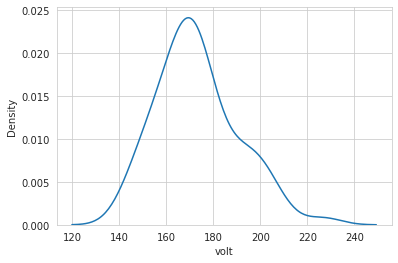

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(data=df_modelo1.loc[df_modelo1['fail_comp3']== 1], x=	'volt')
plt.show()

Aplicando en KS test. De acuerdo a los valores obtenidos se puede concluir que las distribuciones de las dos muestras(falla y no falla) entre la presion y el componente3 no son las mismas.

In [63]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 3.7 MB/s eta 0:00:00


In [ ]:
import sys 
import joblib

In [ ]:
sys.modules['sklearn.externals.joblib'] = joblib

In [163]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [164]:
model2 = SFS(model, k_features = 3, forward = True, scoring = 'accuracy', cv = 5)

In [166]:
model2 = model2.fit(scaledX, y)

In [167]:
model2.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.99953634, 0.99953634, 0.99950068, 0.99950068, 0.99950068]),
  'avg_score': 0.9995149440045651,
  'feature_names': ('0',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.99928668, 0.99917968, 0.99914402, 0.99925102, 0.99921535]),
  'avg_score': 0.9992153505956202,
  'feature_names': ('0', '1')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.99953634, 0.99953634, 0.99950068, 0.99950068, 0.99946501]),
  'avg_score': 0.9995078108281618,
  'feature_names': ('0', '1', '3')}}

In [149]:
X = df_modelo1[['age','volt','pressure']]

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [168]:
# Prueba con mas features
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.30, random_state = 1)

# Seleccion del modelo

Logistic Regression

In [169]:
logistic = LogisticRegression(max_iter=10000, n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [170]:
y_test_pred = logistic.predict(X_test)

In [171]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [172]:
# Sera el accuracy score confiable con un dataset tan desbalanceado este?
accuracy_score(y_test_pred, y_test)

0.9995006776517583

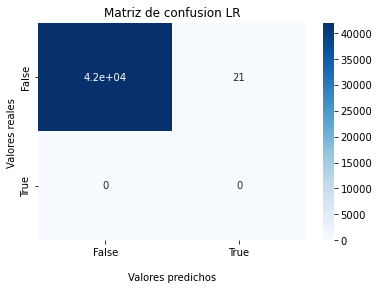

In [173]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test_pred , y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion LR');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

El modelo no logra predecir las instancias de falla

In [105]:
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42036
           1       0.00      0.00      0.00        21

    accuracy                           1.00     42057
   macro avg       0.50      0.50      0.50     42057
weighted avg       1.00      1.00      1.00     42057



c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Para la prueba de este modelo no se realizo normalizacion de la muestra a entrenar.

## Decision Trees

In [157]:
from sklearn import tree

[Text(0.5506867233485938, 0.9761904761904762, 'X[3] <= 2.185\ngini = 0.001\nsamples = 140190\nvalue = [140122, 68]'),
 Text(0.23512099411379986, 0.9285714285714286, 'X[3] <= 1.341\ngini = 0.0\nsamples = 136426\nvalue = [136394, 32]'),
 Text(0.07325049051667756, 0.8809523809523809, 'X[3] <= 0.137\ngini = 0.0\nsamples = 128269\nvalue = [128258, 11]'),
 Text(0.06278613472858077, 0.8333333333333334, 'gini = 0.0\nsamples = 81652\nvalue = [81652, 0]'),
 Text(0.08371484630477437, 0.8333333333333334, 'X[3] <= 0.137\ngini = 0.0\nsamples = 46617\nvalue = [46606, 11]'),
 Text(0.07325049051667756, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09417920209287116, 0.7857142857142857, 'X[3] <= 1.225\ngini = 0.0\nsamples = 46616\nvalue = [46606, 10]'),
 Text(0.06801831262262917, 0.7380952380952381, 'X[2] <= -2.216\ngini = 0.0\nsamples = 44422\nvalue = [44414, 8]'),
 Text(0.04708960104643558, 0.6904761904761905, 'X[2] <= -2.217\ngini = 0.003\nsamples = 732\nvalue = [731, 1]'),


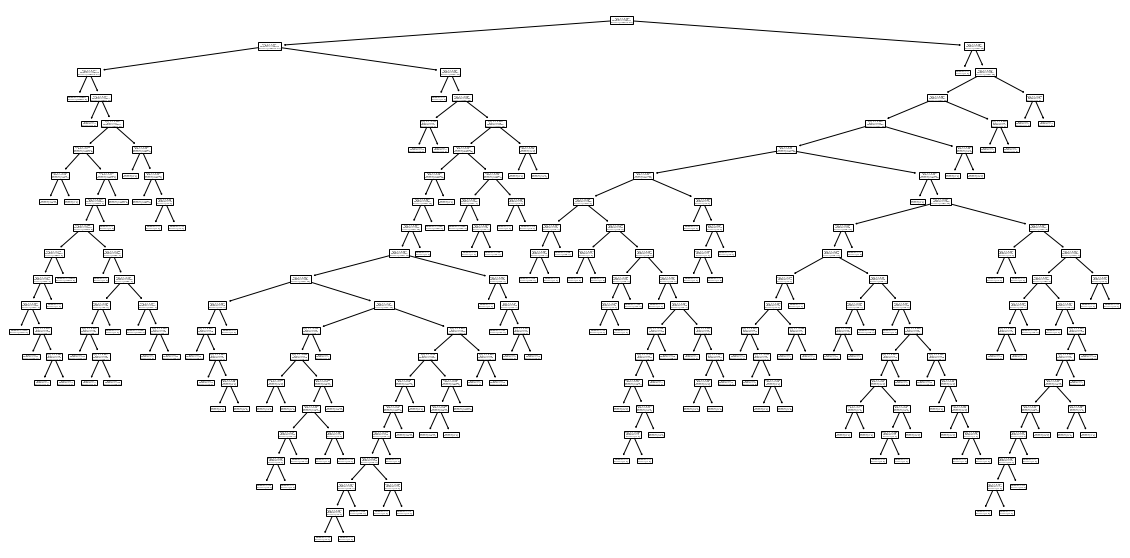

In [159]:
features = ['age','volt','pressure']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(scaledX, y)

fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(dtree) #, feature_names=features)

#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()